In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


In [43]:
# Load the model and data

model = joblib.load('traffic_flow_model.joblib')
df = pd.read_csv('engineered_features.csv', index_col='timestamp', parse_dates=True)

In [44]:
# Prepare features and target

features = ['hour', 'day_of_week', 'is_weekend', 'rolling_mean_24h', 'lag_24h']
X = df[features]
y = df['average']

In [45]:
# Make predictions

y_pred = model.predict(X)

In [46]:
# Calculate performance metrics

mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)


In [47]:
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.44660301725693713
Root Mean Squared Error: 0.5396020024841175
R-squared: 0.7088296789151305


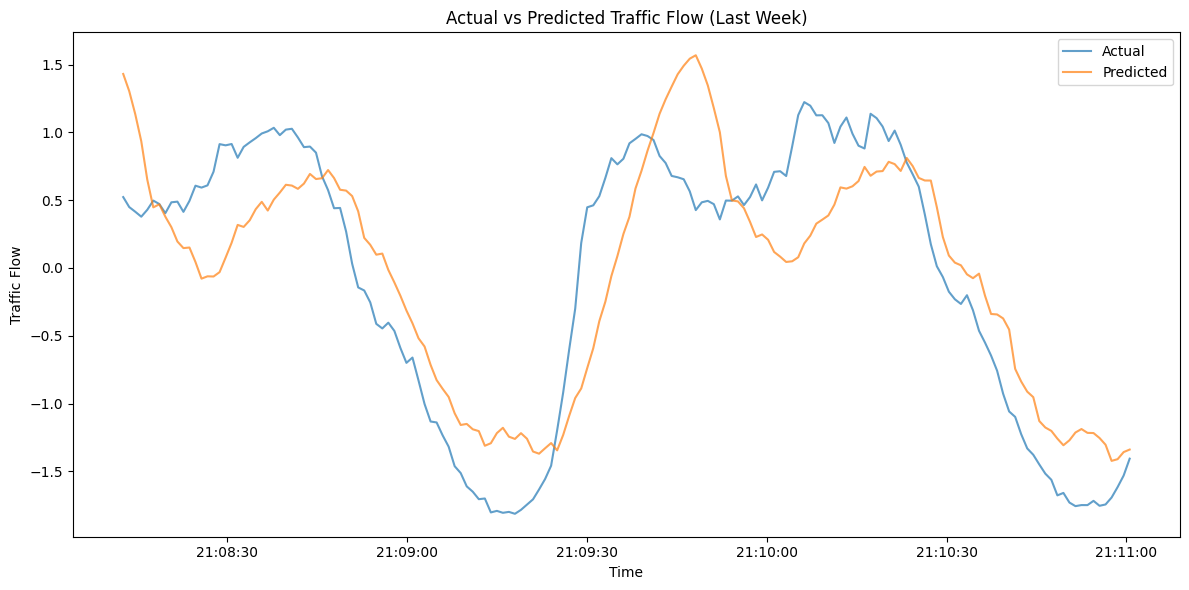

In [48]:
# Plot actual vs. predicted values


plt.figure(figsize=(12, 6))

# Plot the actual traffic flow values for the last 168 hours (1 week)
# Use alpha=0.7 for slight transparency
plt.plot(df.index[-168:], y.iloc[-168:], label='Actual', alpha=0.7)

# Plot the predicted traffic flow values for the last 168 hours
# Use alpha=0.7 for slight transparency
plt.plot(df.index[-168:], y_pred[-168:], label='Predicted', alpha=0.7)

plt.title('Actual vs Predicted Traffic Flow (Last Week)')
plt.xlabel('Time')
plt.ylabel('Traffic Flow')

# Add a legend to distinguish between actual and predicted values
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

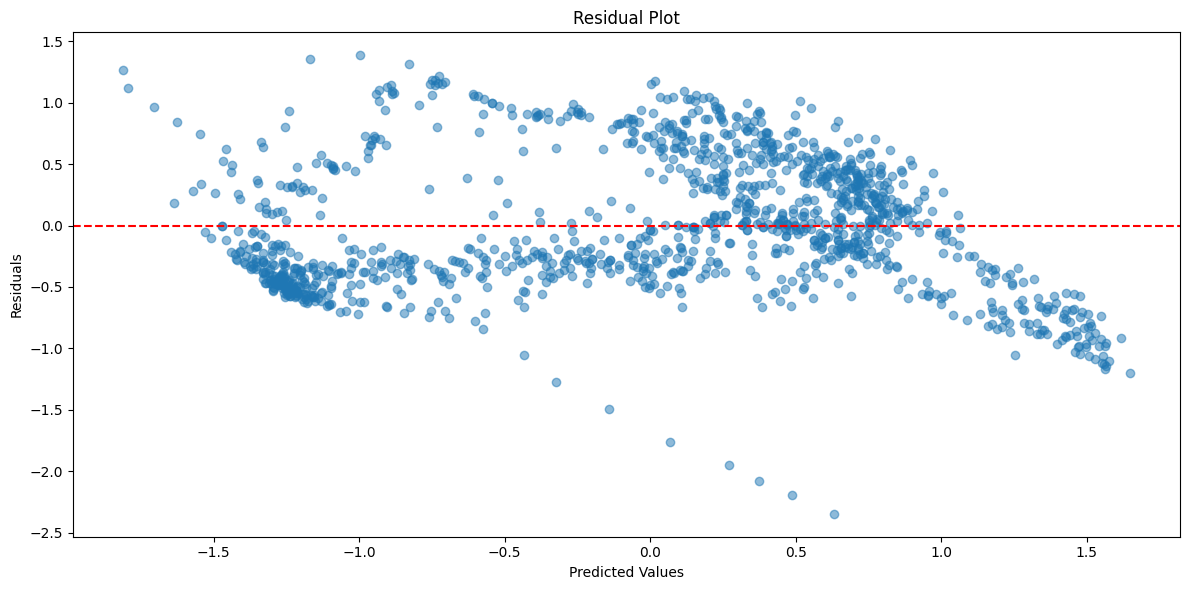

In [49]:
# Residual plot
residuals = y - y_pred
plt.figure(figsize=(12, 6))


# Create a scatter plot of predicted values vs residuals
# alpha=0.5 sets the opacity of points to 50% for better visibility of overlapping points
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Add a horizontal line at y=0 to show where perfect predictions would lie
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()

# Display the plot
plt.show()

In [50]:
# Analyze residuals
print("\nResidual Analysis:")

# Calculate the mean of the residuals
print(f"Mean of residuals: {np.mean(residuals)}")


# Calculate the standard deviation of the residuals
print(f"Standard deviation of residuals: {np.std(residuals)}")


Residual Analysis:
Mean of residuals: 2.2274066951727278e-17
Standard deviation of residuals: 0.5396020024841175


<Figure size 1200x600 with 0 Axes>

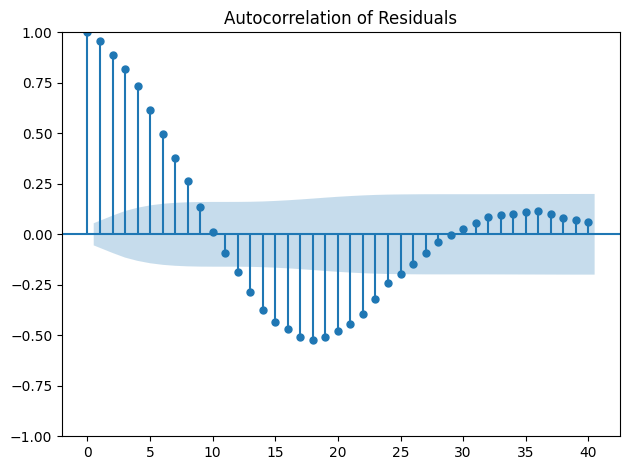

In [42]:

# Check for autocorrelation in residuals

from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=40)
plt.title('Autocorrelation of Residuals')
plt.tight_layout()
plt.show()